**1. What is the underlying concept of Support Vector Machines?**  
Answer: SVM is a supervised machine learning algorithm primarily used for classification, but it can also be used for regression. The main idea behind SVM is to find a hyperplane that best separates the data into classes. In a two-dimensional space, this hyperplane is a line. The best hyperplane is the one that maximizes the margin between the two classes. The margin is defined as the distance between the hyperplane and the nearest data point from either class.

**2. What is the concept of a support vector?**  
Answer: Support vectors are the data points that lie closest to the decision boundary (or hyperplane). They are the data points that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a dataset.

**3. When using SVMs, why is it necessary to scale the inputs?**  
Answer: Scaling is crucial in SVM because the algorithm tries to maximize the distance (margin) between the decision boundary and the support vectors. If one feature has very large values compared to others, it will dominate the objective function and make the classifier biased. Scaling ensures that all features contribute equally to the decision boundary.

**4. When an SVM classifier classifies a case, can it output a confidence score? What about a percentage chance?**  
Answer: SVMs can output a distance score from the decision boundary, which can be converted into a confidence score. However, this isn't a probability. To get a probability score, Platt scaling can be applied post-training, which fits a logistic regression model on the SVM scores.

**5. Should you train a model on a training set with millions of instances and hundreds of features using the primal or dual form of the SVM problem?**  
Answer: For a dataset with millions of instances, the primal form is generally more suitable. The computational complexity of the primal form is proportional to the number of instances, while the dual form's complexity is proportional to a square or cube of the number of instances.

**6. Let's say you've used an RBF kernel to train an SVM classifier, but it appears to underfit the training collection. Is it better to raise or lower (gamma)? What about the letter C?**  
Answer: If the SVM with an RBF kernel underfits the training set, you should increase gamma or decrease its value for a more flexible model. Additionally, increase the regularization parameter C for a more flexible model or decrease it for a more constrained model.

**7. To solve the soft margin linear SVM classifier problem with an off-the-shelf QP solver, how should the QP parameters (H, f, A, and b) be set?**  
Answer: The Quadratic Programming (QP) problem for the soft-margin SVM can be formulated as:
- \( H \) is the matrix where each entry is the product of the target values of the corresponding data points, i.e., \$( H_{ij} = y_i y_j x_i^T x_j \)$.
- \( f \) is a vector of -1's of size equal to the number of training instances.
- \( A \) is a diagonal matrix with the target values \( y \) on its diagonal.
- \( b \) is a vector of zeros for the equality constraints.

**8. On a linearly separable dataset, train a LinearSVC. Then, using the same dataset, train an SVC and an SGDClassifier. See if you can get them to make a model that is similar to yours.**  

C:\Users\shuklas\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


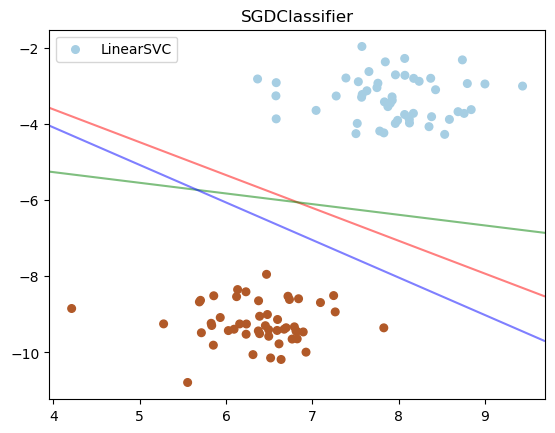

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

# Generate a linearly separable dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=0.60)

# Train LinearSVC
clf_linear = LinearSVC()
clf_linear.fit(X, y)

# Train SVC
clf_svc = SVC(kernel='linear')
clf_svc.fit(X, y)

# Train SGDClassifier
clf_sgd = SGDClassifier(max_iter=1000, tol=1e-3)
clf_sgd.fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(clf, color, label):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors=color, levels=[0], alpha=0.5, linestyles=['-'])
    #ax.set_title(label)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot decision boundaries
plot_decision_boundary(clf_linear, 'r', 'LinearSVC')
plot_decision_boundary(clf_svc, 'g', 'SVC')
plot_decision_boundary(clf_sgd, 'b', 'SGDClassifier')

plt.legend(['LinearSVC', 'SVC', 'SGDClassifier'])
plt.show()


**9. On the MNIST dataset, train an SVM classifier. You'll need to use one-versus-the-rest to assign all 10 digits because SVM classifiers are binary classifiers. To accelerate up the process, you might want to tune the hyperparameters using small validation sets. What level of precision can you achieve?**  

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
digits = datasets.fetch_openml('mnist_784', version=1)
X, y = digits.data, digits.target

# Use a subset for faster training (optional)
X, y = X[:10000], y[:10000]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a LinearSVC classifier
clf = LinearSVC(max_iter=10000, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

C:\Users\shuklas\AppData\Local\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 86.60%


C:\Users\shuklas\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**10. On the California housing dataset, train an SVM regressor.**  

In [3]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better performance
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train[:, None]).ravel()  # Reshape y to 2D and then back to 1D after scaling
y_test = scaler_y.transform(y_test[:, None]).ravel()

# Train an SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")


RMSE: 0.6585
